In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from ashare import api
import mplfinance as mpf
# 下载惠发食品历史数据

# data = yf.download('600830.SH', start='2023-01-01', end='2023-12-31', proxy="http://127.0.0.1:7890")
data = api.query_prices_untilnow("sh605577", frequency="1minute", count=241)# 2024-01-26 09:30:00 -> 2024-01-26 15:00:00
data

,open,close,high,low,volume
time,,,,,
2024-01-26 09:30:00,32.00,32.00,32.00,32.00,10322.0
2024-01-26 09:31:00,31.99,30.25,32.20,30.25,29980.0
2024-01-26 09:32:00,30.11,30.80,31.41,30.00,19116.0
2024-01-26 09:33:00,30.76,30.61,30.76,30.41,9256.0
2024-01-26 09:34:00,30.64,30.00,30.64,30.00,6566.0
...,...,...,...,...,...
2024-01-26 14:56:00,27.72,27.72,27.72,27.72,1565.0
2024-01-26 14:57:00,27.72,27.72,27.72,27.72,1391.0
2024-01-26 14:58:00,27.72,27.72,27.72,27.72,30.0


In [32]:
# REF: https://medium.com/@arseniytyurin/how-to-make-your-histogram-shine-69e432be39ca
def plot_shine_histogram(n, weights, xlabel="", ylabel="", title=""):
    # bins: 横轴分为多少个区域
    # facecolor: 直方图的填充颜色。
    # edgecolor: 直方图的边框颜色。
    # linewidth: 直方图的边框线宽度。
    # alpha: 直方图的透明度，取值范围为 0 到 1，其中 0 表示完全透明，1 表示完全不透明。
    n, bins, patches = plt.hist(n, weights=weights, bins=90, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)

    n = n.astype('int') # it MUST be integer
    # Good old loop. Choose colormap of your taste
    for i in range(len(patches)):
        patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
    # Make one bin stand out   
    patches[47].set_fc('red') # Set color
    patches[47].set_alpha(1) # Set opacity
    # Add annotation
    plt.annotate('Important Bar!', xy=(0.57, 175), xytext=(2, 130), fontsize=15, arrowprops={'width':0.4,'headwidth':7,'color':'#333333'})
    # Add title and labels with custom font sizes
    plt.title(title, fontsize=12)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    plt.show()

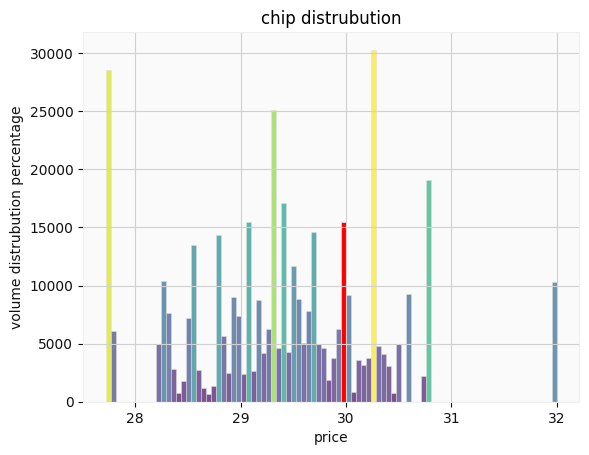

In [33]:
# 计算每个时间段内的平均成交量和价格

# data['volume-rolling'] = data['volume'].rolling(window=5).mean()

# data['close-rolling'] = data['close'].rolling(window=5).mean()

# 整理数据并绘制筹码分布图(给定一段小一点的时间 每个价格交易的次数)
plot_shine_histogram(
    data["close"], 
    weights=data['volume'],
    xlabel="price",
    ylabel="volume distrubution percentage",
    title="chip distrubution"
)

